##### 학습하는 데에 참고한 코드
###### https://github.com/d2l-ai/d2l-ko/blob/master/chapter_linear-networks/image-classification-dataset_origin.md

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install matplotlib_inline

In [3]:
!pip install d2l

In [4]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [5]:
trans = transforms.ToTensor()

## transforms.ToTensor() : PIL 이미지나 NumPy 배열을 PyTorch 텐서로 변환

mnist_train = torchvision.datasets.FashionMNIST(
    root = "../data", train = True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(
    root = "../data", train = False, transform=trans, download = True)

    ## train : train/test 데이터셋 여부 설정. True 면, training set, False 이면 test set
    ## download : True 면, root 폴더에 데이터셋을 다운로드하여 저장
    ## transform : feature를 변환하는 함수 지정. 위 경우에는 tensor로 변환

In [6]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [7]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [8]:
def get_fashion_mnist_labels(labels):
  """Fashion-MNIST를 위한 텍스트라벨을 리턴"""
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [9]:
# visualize example

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  """이미지 리스트 플롯그리기"""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # Tensor Image
      ax.imshow(img.numpy())

      ## Note : 파이토치 텐서를 Matplotlib를 통해 시각화를 진행할 때, Matplotlib는 이미지를 넘파이 배열로 받기를 기대하기 때문에 위와 같은 작업 필요.
      ## Note : Matplotlib의 imshow 메서드 ~ 이미지를 주어진 축(ax)에 표시

    else:
      # PIL Image
      ax.imshow(img)

    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
      ## note : 해당 함수의 title은 리스트 형태여야 함. 결과물에 해당하는 데이터 라벨들을 담는 리스트
  return axes


In [10]:
# # ERROR: Could not build wheels for matplotlib, which is required to install pyproject.toml-based projects

# !pip install --upgrade wheel

!pip install matplotlib

In [11]:
# !pip install matplotlib==3.1.3

array([<Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'bag'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'coat'}>, <Axes: title={'center': 'bag'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'coat'}>, <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'bag'}>, <Axes: title={'center': 'shirt'}>],
      dtype=object)

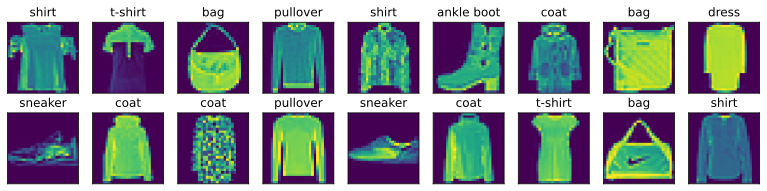

In [12]:
## 1차 시도
# from torch.utils.data import DataLoader

# train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True)
# X, y = next(iter(## 빈칸을 채워주세요. ## ))
# show_images(X.reshape(18,28,28), 2, 9, titles = get_fashion_mnist_labels(y));

## 2차 시도
# training dataset 가져오기
X, y = next(iter(data.DataLoader(dataset=mnist_train, batch_size=18, shuffle=True)))
## note : 
##   batch_size를 18로 설정 ~ 한번의 이터레이터를 돌 때 가져오는 배치 크기가 18
##   따라서 아래에 reshape의 첫번째 인수가 18이 되는 것 ~ 18개 이미지 데이터에 대해 28 * 28 크기로 재정의

show_images(X.reshape(18,28,28), 2, 9, titles = get_fashion_mnist_labels(y))

In [13]:
# Reading a Minibatch
batch_size = 256

def get_dataloader_workers():
  """Use 4 processes to read the data."""
  return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers = get_dataloader_workers())

In [14]:
# training data 읽는 시간 체크

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f}.sec'

'2.26.sec'

In [15]:
# Putting All Things Together


def load_data_fashion_mnist(batch_size, resize=None):
  """Fashion-MNIST dataset 을 다운로드하고 memory로 로드"""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)

    ## note : transforms 과정
    ## trans = [transforms.Resize((256, 256)),
    ##          transforms.ToTensor(),
    ##          transforms.Normalize(mean=[0.5], std=[0.5])
    ##          ]

    ## composed_transform = transforms.Compose(trans)

    ## 이미지 크기 조정, 텐서 변환, 정규화 등 여러 단계의 변환을 적용하고 싶을 때, 각각의 변환을 리스트로 묶어 transforms.Compose로 조합하여 사용
    ## 위 과정은 이미지 크기를 함수의 인자로 전달한 resize 부분에서 정의해준 값으로 재조정해준 뒤, 이를 텐서 변환 해주는 과정을 담고 있음

  mnist_train = torchvision.datasets.FashionMNIST(
      root = "../data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.FashionMNIST(
      root="../data", train=False, transform=trans, download=True)
  return(data.DataLoader(mnist_train, batch_size, shuffle=True,
                         num_workers=get_dataloader_workers()),
         data.DataLoader(mnist_test, batch_size, shuffle=True,
                         num_workers=get_dataloader_workers()))


In [16]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.6 Implementation of Softmax Regression from Scratch

**코드 한 줄 한 줄이 어떤 이유로 쓰였는지 씹어보며 공부해보세요! 😀**

In [17]:
import torch
from IPython import display
from d2l import torch as d2l

In [18]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [19]:
# image flatten to vectors of length 784.
# 각 pixel 위치를 feature로 봄
# class 가 10개니까 아웃풋 dimension이 10
# Gaussian 노이즈로 W 초기값 설정
# 0으로 b 초기값 설정

num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad=True )

## note : 
##      torch.normal ~ 평균 0, 표준편차 0.01의 정규분포를 따르는 난수 생성
##      required_grad ~ 기울기를 계산할지 말지를 결정하는 boolean

b = torch.zeros(num_outputs, requires_grad=True)

In [20]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

## note : 0이면 열방향, 1이면 행방향으로 합을 구하며, keepdim 옵션은 input의 차원 값을 유지할지 결정

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [22]:
# softmax 함수를 구현해보세요.

def softmax(X):
  X_exp =  torch.exp(X)
  ## note : 입력값으로 들어온 tensor 값을 지수화

  partition =  torch.sum(X_exp, dim=1, keepdim=True)
  ## note : 위의 코드랑 문법이 살짝 다른데, X_exp 에 대하셔 행연산을 실시하라는 의미
  return X_exp / partition

  ## note : 
  ##    tensor의 크기(shape)가 같다면 element-wise의 연산이 가능함
  ##    각 tensor 값들은 총합 1인 확률 값으로 재정의되어 반환


In [23]:
X = torch.normal(0, 1, (2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.4180, 0.0346, 0.1145, 0.3218, 0.1111],
         [0.1953, 0.3745, 0.2720, 0.1256, 0.0326]]),
 tensor([1.0000, 1.0000]))

In [24]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

  ## note :
  ##    matmul : tensor 간 행렬 곱을 진행
  ##    reshape를 저렇게 해주는 이유는, W의 shape [size = (num_inputs, num_outputs)] 을 고려해 행렬곱이 수행될 수 있도록 맞춰주는 것

In [25]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0,1], y]

## note : y_hat[0], y_hat[1]에 대해 y 번째 인덱스 값을 선택

tensor([0.1000, 0.5000])

In [26]:
# cross-entropy loss function을 구현해보세요.

## question : 이해가 잘 안감. 실제 값과 예측 값 사이의 간극에 초점을 맞춰야할 것 같은데 왜 이런식으로 계산이 진행될까

def cross_entropy(y_hat, y):
    N = len(y)
    loss = 0.0

    for i in range(N):
        log_prob = torch.log(
            torch.exp(y_hat[i, y[i]]) / torch.sum(torch.exp(y_hat[i])))
        loss += -log_prob

    return loss / N


cross_entropy(y_hat, y)


tensor(1.1466)

In [32]:
## test : 출력 결과 테스트

print(torch.sum(torch.exp(y_hat[0])))
print(torch.exp(y_hat[0]))
print(torch.exp(y_hat[0, y[1]]))

tensor(4.2771)
tensor([1.1052, 1.3499, 1.8221])
tensor(1.8221)
tensor(4.2200)


In [33]:
def accuracy(y_hat, y):
  """correct prediction 수를 계산"""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis = 1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

In [35]:
## test : 출력 결과 테스트

print(y_hat.shape)
print(len(y_hat.shape))
print(y_hat.shape[1])

torch.Size([2, 3])
2


In [ ]:
accuracy(y_hat, y) / len(y)

0.5

In [ ]:
def evaluate_accuracy(net, data_iter):
    """모델 정확도 계산"""
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)

    ## 무엇이 들어가야할까요? ##
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
class Accumulator:
    """n 개 변수 합 축적"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
evaluate_accuracy(net, test_iter)

0.0912

In [ ]:
def train_epoch(net, train_iter, loss, updater):
    """training loop"""
    # Set the model to training model
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, number of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.mean().## 빈칸을 채워주세요. ##
            updater.step()
        else:
            # Using custom built optimizer & loss criterion
            l.sum().## 빈칸을 채워주세요. ##
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:
    """애니메이션으로 데이터 플롯팅"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


In [ ]:
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    """모델 학습"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


In [ ]:
lr = 0.1

def updater(batch_size):
  return d2l.sgd([W, b], lr, batch_size)

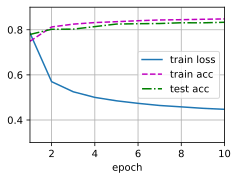

In [ ]:
num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

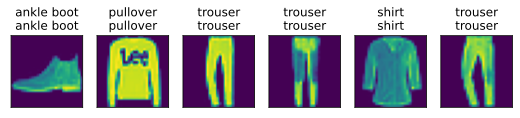

In [ ]:
def predict(net, test_iter, n=6):
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis = 1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(
      X[0:n].reshape((n, 28, 28)), 1 , n, titles = titles[0:n])
predict(net, test_iter)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
loss = nn.CrossEntropyLoss(reduction = 'none')

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)

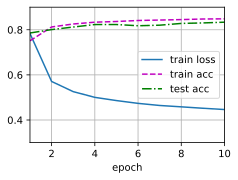

In [ ]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 세션 때 배운 코드를 복습해봐요 😀

**강의자료 보지않고 빈 칸 채워보기!**

# Numpy

### data generation

In [ ]:
import numpy as np

true_b = 1
true_w = 2

N = 100

np.random.seed(42)
x = np.random.rand(N,1)  # Uniform
epsilon = (0.1 * np.random.randn(N,1))  # standard normal dist  # noise
y = ## 빈칸을 채워주세요. ##

### Train-Validation Split

In [ ]:
# Shuffles the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[## 빈칸을 채워주세요. ##]
val_idx = idx[## 빈칸을 채워주세요. ##]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

### Gradient Descent for Linear Regression

In [ ]:
# 실행시간을 측정해주는 Decorator 입니다.

import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Execution time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [ ]:
@timer
def train_model_numpy(lr = 0.1, epochs = 1000):
  # Initialize parameters
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    mse_loss = ## 빈칸을 채워주세요. ##

    # Gradient computation
    b_grad = ## 빈칸을 채워주세요. ## 미분 어떻게 했었죠?ㅎㅎ
    w_grad = ## 빈칸을 채워주세요. ##
    b = b - lr * b_grad
    w = w - lr * w_grad
  return b, w


In [ ]:
b, w = train_model_numpy()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_numpy: 0.031105756759643555 seconds
b_estimate:[1.02341376], w_estimate:[1.93680725]


# Pytorch

### Data Generation

In [ ]:
import torch

# create tensor at CPU:
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor ar GPU:
## 빈칸을 채워주세요. ##  # GPU가 현재 연결이 되어있다면 cuda를 콜하겠다. 아니면 cpu 쓰겠다! 하는 코드
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)


### Gradient Descent

In [ ]:
@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, ## 빈칸을 채워주세요. ##)
  w = torch.randn(1, ## 빈칸을 채워주세요. ##)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = ## 빈칸을 채워주세요. ##
    # Gradient computation and descent
    mse_loss.backward()
    ## 빈칸을 채워주세요. ## # 경사 하강법 할 땐 auto grad 끄고 하는 게 좋죠!
      b ## 빈칸을 채워주세요. ##  # in-place operation 써줘야합니다!
      w ## 빈칸을 채워주세요. ##
    b.## 빈칸을 채워주세요. ## # gradient 초기화 시켜줘야해요. 안 하면 누적합으로 계산하기 때문에!
    w.## 빈칸을 채워주세요. ##
  return b, w

In [ ]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_torch: 0.5386159420013428 seconds
b_estimate:tensor([1.0234], device='cuda:0', requires_grad=True), w_estimate:tensor([1.9368], device='cuda:0', requires_grad=True)


**optimizer 를 사용해서 gradient descent 를 하는 방법도 있어요!**

In [ ]:
import torch.optim as optim
import torch.nn as nn

@timer
def train_model_torch(lr = 0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  w = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr = lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient computation and descent
    loss.backward()
    optimizer.step() # 경사하강법 연산, step 한 번을 밟는다!
    optimizer.zero_grad()
  return b, w

In [ ]:
b, w = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b,w))

Execution time of train_model_torch: 0.6350758075714111 seconds
b_estimate:tensor([1.0234], device='cuda:0', requires_grad=True), w_estimate:tensor([1.9368], device='cuda:0', requires_grad=True)
